# United Nations Parallel Corpora Analysis using SpaCy and Camel
### Kinan Al-Mouk / kim47@pitt.edu 

## Table of Contents 
[`Imports`](#Importing-Tools)

[`Uploading and Processing Data`](#Uploading-and-Processing-Data-using-Spacy)
    
   - [`English`](#English)
       - [Reading File](#Reading-in-English-File)
       - [Downloading SpaCy English Module](#Downloading-SpaCy-object-for-English-processing)
       - [Word Tokenizing](#Word-Tokenizing-English-Document)
       - [Sentence Tokenizing](#Sentence-Tokenizing-English-Document)
       - [POS Tagging](#POS-Tagging-English-Document)
       - [Dependency Tagging](#Dependency-Tagging-English-Document)
           - Image Rendering
       - [Stop Word Tagging](#Eng-Stop-Word-Tagging)
       - [Entity Tagging](#English-Entity-Tagging)
   - [`Spanish`](#Spanish)
       - [Reading File](#Reading-in-Spanish-File)
       - [Word Tokenizing](#Word-Tokenizing-Spanish-Document)
       - [Sentence Tokenizing](#Sentence-Tokenizing-Spanish-Document)
       - [POS Tagging](#POS-Tagging-Spanish-Document)
       - [Dependency Tagging](#Dependency-Tagging-Spanish-Document)
           - Image Rendering
       - [Entity Tagging](#Spanish-Entity-Tagging)
   - [`French`](#French)
       - [Reading File](#Reading-in-French-File)
       - [Word Tokenizing](#Word-Tokenizing-French-Document)
       - [Sentence Tokenizing](#Sentence-Tokenizing-French-Document)
       - [POS Tagging](#POS-Tagging-French-Document)
       - [Dependency Tagging](#Dependency-Tagging-French-Document)
           - Image Rendering
       - [Entity Tagging](#French-Entity-Tagging)
   - [`Russian`](#Russian)
       - [Reading File](#Reading-in-Russian-File)
       - [Word Tokenizing](#Word-Tokenizing-Russian-Document)
       - [Sentence Tokenizing](#Sentence-Tokenizing-Russian-Document)
       - [POS Tagging](#POS-Tagging-Russian-Document)
       - [Dependency Tagging](#Dependency-Tagging-Russian-Document)
       - [Entity Tagging](#Russian-Entity-Tagging)
   - [`Chinese`](#Chinese)
       - [Reading File](#Reading-in-Mandarin-File)
       - [Word Tokenizing](#Word-Tokenizing-Mandarin-Document)
       - [Sentence Tokenizing](#Sentence-Tokenizing-Mandarin-Document)
       - [POS Tagging](#POS-Tagging-Mandarin-Document)
       - [Dependency Tagging](#Dependency-Tagging-Mandarin-Document)
       - [Entity Tagging](#Mandarin-Entity-Tagging)
   - [`Arabic`](#Arabic)
   
[`Creating DataFrame for Analyzation`](#Creating-DataFrame-for-Analyzation)
    - [Compiling Data](#Compiling-Data)
        
  


# Importing Tools

In [1]:
import nltk 
import pickle
from time import time
import numpy as np 
import pandas as pd 

In [2]:
import spacy

I am using [SpaCy](https://spacy.io/) for NLP of **English, Spanish, French, Russian**, and **Mandarin Chinese** in order to ensure that the tokenization for each langauge remains accurate since NLTK is mostly and primarily used for English language NLP.

However there is no [SpaCy](https://spacy.io/) module that can allow me to process the **Arabic** files. At the moment I am still looking into other resources.

# Uploading and Processing Data using Spacy

## English

### Reading in File

In [3]:
# Loading in English Files
start = time()
f = open('data/sixway/english.100k', 'r') # Reading in English File
english = f.read()
print("Data loaded in:", (time()-start), "seconds.")
f.close()

Data loaded in: 0.2325291633605957 seconds.


### Downloading SpaCy object for English processing

In [4]:
english_samp = english[:1000000] # 1000000 is the characther limit for SpaCy processing

In [5]:
start = time()
nlp = spacy.load('en_core_web_sm')
eng_doc = nlp(english_samp)

print("English document processed in:", (time()-start), "seconds.")

English document processed in: 78.6938841342926 seconds.


Here I am using the `time` function to see how long it takes to train files in [SpaCy](https://spacy.io/)'s processor. It takes the English document about 86.43 seconds to complete. This is not long in comparision to the amount of time it takes **Mandarin** to complete.

### Word Tokenizing English Document

In [6]:
start = time()

eng_tokens = [token for token in eng_doc]  # Tokenizing Document

print("English document word tokenized in:", (time()-start), "seconds.")

English document word tokenized in: 0.3089020252227783 seconds.


In [7]:
print('English Word Tokens Count:', len(eng_tokens), '\n \n', eng_tokens[:20])

English Word Tokens Count: 177808 
 
 [RESOLUTION, 918, (, 1994, ), 
, Adopted, by, the, Security, Council, at, its, 3377th, meeting, ,, on, 17, May, 1994]


[SpaCy's Tokenizer](https://spacy.io/api/tokenizer) segments text into words, puncutation marks, etc. Additionally it creates a `Doc` object with the discovered segment boundaries. Their **global** and **langauge-specific** data is supplied via the langauge data in [`spacy/lang`]

### Sentence Tokenizing English Document

In [8]:
start = time()
eng_sent = [sent.text for sent in eng_doc.sents]
print("English document sentence tokenized in:", (time()-start), "seconds.")

English document sentence tokenized in: 0.16350173950195312 seconds.


In [9]:
len(eng_sent)

6662

In [10]:
example_eng_sent = eng_sent[1]
print(example_eng_sent)

Demands that all parties to the conflict immediately cease hostilities, agree to a cease-fire, and bring an end to the mindless violence and carnage engulfing Rwanda;
2.


### POS Tagging English Document

In [11]:
start = time()
eng_pos = [token.pos_ for token in eng_doc] 
print("English document POS tagged in:", (time()-start), "seconds.")

English document POS tagged in: 0.0859220027923584 seconds.


In [12]:
print('\nList of POS tags:', set(eng_pos), '\n\nPOS count:', len(set(eng_pos)))


List of POS tags: {'INTJ', 'SYM', 'SCONJ', 'DET', 'VERB', 'SPACE', 'ADJ', 'PRON', 'NOUN', 'CCONJ', 'AUX', 'ADV', 'PART', 'NUM', 'X', 'ADP', 'PUNCT', 'PROPN'} 

POS count: 18


The [SpaCy](https://spacy.io/) library is quite easy. All that is neccessary is tot instantiate a [SpaCy](https://spacy.io/) object as doc, then iterate over the `Doc` object and use `pos_` to print the **POS**.

### Dependency Tagging

In [13]:
from spacy import displacy
from pathlib import Path


In [14]:
start = time()
eng_dep = [token.dep_ for token in eng_doc] 
print("English document DEP tagged in:", (time()-start), "seconds.")

English document DEP tagged in: 0.07151985168457031 seconds.


In [15]:
eng_dep[:5]

['nsubj', 'nummod', 'punct', 'npadvmod', 'punct']

In [16]:
len(set(eng_dep))

45

[SpaCy](https://spacy.io/)'s **dependency parser** come with a visualiztion module. We can pass a Doc or a list of Doc objects to displaCy and run `displacy.render` to generate the raw markup. I am using the example sentence from above `example_eng_sent` because it is one of the shortest sentences I managed to find. 

In [17]:
sentence_doc = nlp(example_eng_sent)
svg = displacy.render(sentence_doc, style='dep')

### Stop Word Tagging

In [18]:
start = time()
eng_stop = [token for token in eng_doc if token.is_stop is False]
print("English document STOP tagged in:", (time()-start), "seconds.")

English document STOP tagged in: 0.22710871696472168 seconds.


### Entity Tagging

In [19]:
start = time()
eng_ent = []
eng_label = []
for ent in eng_doc.ents:
    eng_ent.append(ent.text)
    eng_label.append(ent.label_)
print("English document entity tagged in:", (time()-start), "seconds.")

English document entity tagged in: 0.07051491737365723 seconds.


In [20]:
print(set(eng_label))

{'EVENT', 'CARDINAL', 'NORP', 'ORG', 'LAW', 'MONEY', 'TIME', 'LANGUAGE', 'PERCENT', 'WORK_OF_ART', 'DATE', 'PRODUCT', 'FAC', 'QUANTITY', 'ORDINAL', 'LOC', 'PERSON', 'GPE'}


In [21]:
eng_ents = np.column_stack((eng_ent, eng_label))

In [22]:
print(eng_ents[:10], '\n\nLength of English Entities:', len(eng_ents))

[['918' 'CARDINAL']
 ['1994' 'DATE']
 ['the Security Council' 'ORG']
 ['3377th' 'ORDINAL']
 ['17 May 1994' 'DATE']
 ['The Security Council' 'ORG']
 ['Rwanda' 'GPE']
 ['resolution 872' 'LAW']
 ['1993' 'DATE']
 ['5 October 1993' 'DATE']] 

Length of English Entities: 12124


## Spanish

### Reading in Spanish File

In [23]:
# Loading in Spanish Files
start = time()

f = open('data/sixway/spanish.100k', 'r') # Reading in Spanish File
spanish100 = f.read()
print("Data loaded in:", (time()-start), "seconds.")
f.close()

Data loaded in: 0.16715478897094727 seconds.


In [24]:
# Creating Smaller Slice to Analyze using SpaCy
spanish_samp = spanish100[:1000000]

### Downloading SpaCy object for Spanish processing

In [25]:
start = time()

nlp = spacy.load('es_core_news_sm')
es_doc = nlp(spanish_samp)

print("Spanish document processed in:", (time()-start), "seconds.")

Spanish document processed in: 71.24441599845886 seconds.


### Word Tokenizing Spanish Document

In [26]:
start = time()
es_tokens = [token for token in es_doc]
print("Spanish document tokenized in:", (time()-start), "seconds.")

Spanish document tokenized in: 0.23283123970031738 seconds.


In [27]:
print('Spanish Word Tokens Count:', len(es_tokens), '\n \n', es_tokens[:20])

Spanish Word Tokens Count: 176209 
 
 [RESOLUCIÓN, 918, (, 1994, ), 
, Aprobada, por, el, Consejo, de, Seguridad, en, su, 3377ª, sesión, ,, celebrada, el, 17]


### Sentence Tokenizing Spanish Document

In [28]:
start = time()
es_sent = [sent.text for sent in es_doc.sents]
print("Spanish document sentence tokenized in:", (time()-start), "seconds.")

Spanish document sentence tokenized in: 0.15321087837219238 seconds.


In [29]:
len(es_sent)

4861

In [30]:
example_es_sent = es_sent[1]
print(example_es_sent)

Exige que todas las partes en el conflicto pongan fin inmediatamente a las hostilidades, convengan en una cesación del fuego y pongan término a la violencia y la carnicería insensatas en que está sumida Rwanda;
2.


#### Comparing SpaCy English Tokenizer with Spanish Tokenizer

In [31]:
print(eng_sent[1],'\n\n',es_sent[1])

Demands that all parties to the conflict immediately cease hostilities, agree to a cease-fire, and bring an end to the mindless violence and carnage engulfing Rwanda;
2. 

 Exige que todas las partes en el conflicto pongan fin inmediatamente a las hostilidades, convengan en una cesación del fuego y pongan término a la violencia y la carnicería insensatas en que está sumida Rwanda;
2.


### POS Tagging Spanish Document

In [32]:
start = time()
es_pos = [token.pos_ for token in es_doc] 
print("Spanish document POS tagged in:", (time()-start), "seconds.")

Spanish document POS tagged in: 0.08788204193115234 seconds.


In [33]:
print('\nList of POS tags:', set(es_pos), '\n\nPOS count:', len(set(es_pos)))


List of POS tags: {'INTJ', 'SYM', 'SCONJ', 'DET', 'VERB', 'NOUN', 'SPACE', 'ADJ', 'PRON', 'CCONJ', 'AUX', 'ADV', 'PART', 'NUM', 'ADP', 'PUNCT', 'PROPN'} 

POS count: 17


In [34]:
print(set(es_pos))

{'INTJ', 'SYM', 'SCONJ', 'DET', 'VERB', 'NOUN', 'SPACE', 'ADJ', 'PRON', 'CCONJ', 'AUX', 'ADV', 'PART', 'NUM', 'ADP', 'PUNCT', 'PROPN'}


### Dependency Tagging Spanish File

In [35]:
start = time()
es_dep = [token.dep_ for token in es_doc] 
print("Spanish document DEP tagged in:", (time()-start), "seconds.")

Spanish document DEP tagged in: 0.09554100036621094 seconds.


In [36]:
es_dep[:5]

['nsubj', 'nummod', 'punct', 'appos', 'punct']

In [37]:
len(set(es_dep))

31

In [38]:
print(set(eng_dep)-set(es_dep))

{'predet', 'nsubjpass', 'relcl', 'pcomp', 'expl', 'auxpass', 'agent', 'poss', 'preconj', 'npadvmod', 'intj', 'acomp', 'csubjpass', 'neg', 'pobj', 'attr', 'prep', 'dative', 'quantmod', 'dobj', 'prt', 'meta', 'oprd'}


In [39]:
sentence_doc = nlp(example_es_sent)
displacy.render(sentence_doc, style='dep')

### Entity Tagging

In [40]:
start = time()
es_ent = []
es_label = []
for ent in es_doc.ents:
    es_ent.append(ent.text)
    es_label.append(ent.label_)
print("Spanish document entity tagged in:", (time()-start), "seconds.")

Spanish document entity tagged in: 0.0872337818145752 seconds.


In [41]:
print(set(es_label))

{'PER', 'LOC', 'MISC', 'ORG'}


In [42]:
es_ents = np.column_stack((es_ent, es_label))

In [43]:
print(es_ents[:10], '\n\nLength of Spanish Entities:', len(es_ents))

[['Aprobada' 'LOC']
 ['Consejo de Seguridad' 'ORG']
 ['Consejo de Seguridad' 'ORG']
 ['Rwanda' 'LOC']
 ['Misión de Asistencia de las Naciones Unidas a Rwanda' 'LOC']
 ['UNAMIR' 'ORG']
 ['UNAMIR' 'ORG']
 ['UNAMIR' 'ORG']
 ['Presidente del Consejo' 'MISC']
 ['S/PRST/1994/16' 'MISC']] 

Length of Spanish Entities: 9826


## French

### Reading in French File

In [44]:
# Loading in French Files
start = time()
f = open('data/sixway/french.100k', 'r') # Reading in French File
french100 = f.read()
print("Data loaded in:", (time()-start), "seconds.")
f.close()

Data loaded in: 0.17997527122497559 seconds.


In [45]:
# Creating Smaller Slice to Analyze using SpaCy
french_samp = french100[:1000000]

### Downloading SpaCy object for French processing

In [46]:
start = time()
nlp = spacy.load('fr_core_news_sm')
fr_doc = nlp(french_samp)

print("French document processed in:", (time()-start), "seconds.")

French document processed in: 85.39907217025757 seconds.


### Word Tokenizing French Document

In [47]:
start = time()
fr_tokens = [token for token in fr_doc]
print("French document tokenized in:", (time()-start), "seconds.")

French document tokenized in: 0.4748668670654297 seconds.


### Sentence Tokenizing French Document

In [48]:
start = time()
fr_sent = [sent.text for sent in fr_doc.sents]
print("French document sentence tokenized in:", (time()-start), "seconds.")

French document sentence tokenized in: 0.15012502670288086 seconds.


In [49]:
len(fr_sent)

9440

In [50]:
example_fr_sent = fr_sent[4]
print(example_fr_sent)

Exige que toutes les parties au conflit cessent immédiatement les hostilités, acceptent un cessez-le-feu et mettent fin à la violence et au carnage insensés dans lesquels est plongé le Rwanda;


In [51]:
print(example_eng_sent,'\n\n',example_es_sent, '\n\n',example_fr_sent)

Demands that all parties to the conflict immediately cease hostilities, agree to a cease-fire, and bring an end to the mindless violence and carnage engulfing Rwanda;
2. 

 Exige que todas las partes en el conflicto pongan fin inmediatamente a las hostilidades, convengan en una cesación del fuego y pongan término a la violencia y la carnicería insensatas en que está sumida Rwanda;
2. 

 Exige que toutes les parties au conflit cessent immédiatement les hostilités, acceptent un cessez-le-feu et mettent fin à la violence et au carnage insensés dans lesquels est plongé le Rwanda;


### POS Tagging French Documnent

In [52]:
start = time()
fr_pos = [token.pos_ for token in fr_doc] 
print("French document POS tagged in:", (time()-start), "seconds.")

French document POS tagged in: 0.0890660285949707 seconds.


In [53]:
print('\nList of POS tags:', set(fr_pos), '\n\nPOS count:', len(set(fr_pos)))


List of POS tags: {'SYM', 'SCONJ', 'DET', 'VERB', 'SPACE', 'NOUN', 'ADJ', 'PRON', 'CCONJ', 'AUX', 'ADV', 'X', 'NUM', 'ADP', 'PUNCT', 'PROPN'} 

POS count: 16


In [54]:
print(set(fr_pos))

{'SYM', 'SCONJ', 'DET', 'VERB', 'SPACE', 'NOUN', 'ADJ', 'PRON', 'CCONJ', 'AUX', 'ADV', 'X', 'NUM', 'ADP', 'PUNCT', 'PROPN'}


### Dependency Tagging French File

In [55]:
start = time()
fr_dep = [token.dep_ for token in fr_doc] 
print("French document DEP tagged in:", (time()-start), "seconds.")

French document DEP tagged in: 0.08251023292541504 seconds.


In [56]:
fr_dep[:5]

['ROOT', 'nummod', 'punct', 'nummod', 'punct']

In [57]:
len(set(es_dep))

31

In [58]:
print(set(fr_dep)-set(eng_dep))

{'flat:foreign', 'obj', 'expl:comp', 'nsubj:pass', 'obl:mod', 'expl:pass', 'iobj', 'cop', 'vocative', 'expl:subj', 'flat:name', 'fixed', 'aux:pass', 'obl:arg', 'acl:relcl', 'aux:tense', 'obl:agent'}


In [59]:
sentence_doc = nlp(example_fr_sent)
displacy.render(sentence_doc, style='dep')

### Entity Tagging

In [60]:
start = time()
fr_ent = []
fr_label = []
for ent in fr_doc.ents:
    fr_ent.append(ent.text)
    fr_label.append(ent.label_)
print("French document entity tagged in:", (time()-start), "seconds.")

French document entity tagged in: 0.10802006721496582 seconds.


In [61]:
print(set(fr_label))

{'PER', 'LOC', 'MISC', 'ORG'}


In [62]:
fr_ents = np.column_stack((fr_ent, fr_label))
print(fr_ents[:10], '\n\nLength of French Entities:', len(fr_ents))

[['RESOLUTION 918' 'MISC']
 ['Conseil de sécurité' 'ORG']
 ['Conseil de sécurité' 'ORG']
 ['Rwanda' 'LOC']
 ['Mission des Nations Unies' 'MISC']
 ['Rwanda' 'LOC']
 ['MINUAR' 'LOC']
 ['MINUAR' 'MISC']
 ['MINUAR' 'MISC']
 ['Président' 'PER']] 

Length of French Entities: 7853


## Russian

In [63]:
# Loading in Russian Files
start = time()
f = open('data/sixway/russian.100k', 'r') # Reading in Russian File
russian100 = f.read()
print("Data loaded in:", (time()-start), "seconds.")
f.close()

Data loaded in: 0.17405390739440918 seconds.


In [64]:
# Creating Smaller Slice to Analyze using SpaCy
russian_samp = russian100[:1000000]

### Downloading SpaCy object for Russian processing

In [65]:
start = time()
nlp = spacy.load('ru_core_news_sm')
ru_doc = nlp(russian_samp)
print("Russian document processed in:", (time()-start), "seconds.")

Russian document processed in: 102.69812893867493 seconds.


### Word Tokenizing Russian Document

In [66]:
start = time()

ru_tokens = [token for token in ru_doc]  # Tokenizing Document

print("Russian document word tokenized in:", (time()-start), "seconds.")

Russian document word tokenized in: 0.4216310977935791 seconds.


In [67]:
print('Russian Word Tokens Count:', len(ru_tokens), '\n \n', ru_tokens[:20])

Russian Word Tokens Count: 153964 
 
 [РЕЗОЛЮЦИЯ, 918, (, 1994, ), ,, 
, принятая, Советом, Безопасности, на, его, 3377-м, заседании, 17, мая, 1994, года, 
, Совет]


### Sentence Tokenizing Russian Document

In [68]:
start = time()
ru_sent = [sent.text for sent in ru_doc.sents]
print("Russian document sentence tokenized in:", (time()-start), "seconds.")

Russian document sentence tokenized in: 0.18230891227722168 seconds.


In [69]:
len(ru_sent)

9310

In [70]:
example_ru_sent = ru_sent[13]
print(example_ru_sent)

требует, чтобы все стороны в конфликте немедленно прекратили военные действия, договорились о прекращении огня и положили конец бессмысленному насилию и резне, охватившим Руанду;



In [71]:
print(example_eng_sent,'\n\n',example_es_sent, '\n\n',example_fr_sent, '\n\n',example_ru_sent)

Demands that all parties to the conflict immediately cease hostilities, agree to a cease-fire, and bring an end to the mindless violence and carnage engulfing Rwanda;
2. 

 Exige que todas las partes en el conflicto pongan fin inmediatamente a las hostilidades, convengan en una cesación del fuego y pongan término a la violencia y la carnicería insensatas en que está sumida Rwanda;
2. 

 Exige que toutes les parties au conflit cessent immédiatement les hostilités, acceptent un cessez-le-feu et mettent fin à la violence et au carnage insensés dans lesquels est plongé le Rwanda; 

 требует, чтобы все стороны в конфликте немедленно прекратили военные действия, договорились о прекращении огня и положили конец бессмысленному насилию и резне, охватившим Руанду;



### POS Tagging Russian Document

In [72]:
start = time()
ru_pos = [token.pos_ for token in ru_doc] 
print("Russian document POS tagged in:", (time()-start), "seconds.")

Russian document POS tagged in: 0.06488704681396484 seconds.


In [73]:
print('\nList of POS tags:', set(fr_pos), '\n\nPOS count:', len(set(fr_pos)))


List of POS tags: {'SYM', 'SCONJ', 'DET', 'VERB', 'SPACE', 'NOUN', 'ADJ', 'PRON', 'CCONJ', 'AUX', 'ADV', 'X', 'NUM', 'ADP', 'PUNCT', 'PROPN'} 

POS count: 16


In [74]:
print(set(ru_pos))

{'INTJ', 'SYM', 'SCONJ', 'DET', 'VERB', 'SPACE', 'NOUN', 'PRON', 'CCONJ', 'ADV', 'AUX', 'X', 'PART', 'NUM', 'ADP', 'PROPN', 'PUNCT', 'ADJ'}


### Dependency Tagging Russian File

In [75]:
start = time()
ru_dep = [token.dep_ for token in ru_doc] 
print("Russian document DEP tagged in:", (time()-start), "seconds.")

Russian document DEP tagged in: 0.08480000495910645 seconds.


In [76]:
ru_dep[:5]

['nsubj', 'appos', 'punct', 'parataxis', 'punct']

In [77]:
len(set(ru_dep))

40

In [78]:
print(set(ru_dep)-set(eng_dep))

{'obl', 'flat:foreign', 'obj', 'discourse', 'nsubj:pass', 'list', 'iobj', 'cop', 'flat', 'nummod:gov', 'csubj:pass', 'orphan', 'fixed', 'aux:pass', 'flat:name', 'acl:relcl', 'nummod:entity', 'obl:agent'}


### Entity Tagging Russian

In [79]:
start = time()
ru_ent = []
ru_label = []
for ent in ru_doc.ents:
    ru_ent.append(ent.text)
    ru_label.append(ent.label_)
print("Russian document entity tagged in:", (time()-start), "seconds.")

Russian document entity tagged in: 0.06423711776733398 seconds.


In [80]:
print(set(ru_label))

{'PER', 'LOC', 'ORG'}


In [81]:
ru_ents = np.column_stack((ru_ent, ru_label))

In [82]:
print(ru_ents[:10], '\n\nLength of Russian Entities:', len(ru_ents))

[['Советом Безопасности' 'ORG']
 ['Совет Безопасности' 'ORG']
 ['Руанде' 'LOC']
 ['Миссию Организации Объединенных Наций' 'ORG']
 ['Руанде' 'LOC']
 ['МООНПР' 'ORG']
 ['МООНПР' 'ORG']
 ['Председателя' 'PER']
 ['Совета Безопасности' 'ORG']
 ['Организации Объединенных Наций' 'ORG']] 

Length of Russian Entities: 5827


## Mandarin

### Reading in Mandarin File

In [83]:
# Loading in Mandarin Files
start = time()
f = open('data/sixway/mandarin.100k', 'r') # Reading in Mandarin File
mandarin100 = f.read()
print("Data loaded in:", (time()-start), "seconds.")
f.close()

Data loaded in: 0.08400607109069824 seconds.


In [84]:
# Creating Smaller Slice to Analyze using SpaCy
mandarin_samp = mandarin100[:1000000]

### Downloading SpaCy object for Mandarin processing

In [85]:
start = time()
nlp = spacy.load('zh_core_web_sm')
zh_doc = nlp(mandarin_samp)
print("Mandarin document processed in:", (time()-start), "seconds.")

Mandarin document processed in: 729.5208401679993 seconds.


SpaCy's Mandarin module takes about 881 seconds, which is painstaking to work with.

### Word Tokenizing Mandarin Document

In [86]:
start = time()
zh_tokens = [token for token in zh_doc]
print("Mandarin document tokenized in:", (time()-start), "seconds.")


Mandarin document tokenized in: 1.9235107898712158 seconds.


In [87]:
print('Mandarin Word Tokens Count:', len(zh_tokens), '\n \n', zh_tokens[:20])

Mandarin Word Tokens Count: 553748 
 
 [第918, (, 1994, )号, 决议, 
, 1994年, 5月, 17日, 安全, 理事会, 第3377, 次, 会议, 通过, 
, 安全, 理事会, ，, 
]


### Sentence Tokenizing Mandarin Document

In [88]:
start = time()
zh_sent = [sent.text for sent in zh_doc.sents]
print("Mandarin document sentence tokenized in:", (time()-start), "seconds.")

Mandarin document sentence tokenized in: 0.5604169368743896 seconds.


In [89]:
len(zh_sent)

23363

In [90]:
example_zh_sent = zh_sent[6]
print(example_zh_sent)

要求卢旺达各当事方严格尊重联合国及其他在卢旺达服务的组织的人员和房地，并避免对从事人道主义和维持和平工作的人员进行任何恐吓或暴力行为；
12.


In [91]:
print(example_eng_sent,'\n\n',example_es_sent, '\n\n',
      example_fr_sent, '\n\n',example_ru_sent, '\n\n', example_zh_sent)

Demands that all parties to the conflict immediately cease hostilities, agree to a cease-fire, and bring an end to the mindless violence and carnage engulfing Rwanda;
2. 

 Exige que todas las partes en el conflicto pongan fin inmediatamente a las hostilidades, convengan en una cesación del fuego y pongan término a la violencia y la carnicería insensatas en que está sumida Rwanda;
2. 

 Exige que toutes les parties au conflit cessent immédiatement les hostilités, acceptent un cessez-le-feu et mettent fin à la violence et au carnage insensés dans lesquels est plongé le Rwanda; 

 требует, чтобы все стороны в конфликте немедленно прекратили военные действия, договорились о прекращении огня и положили конец бессмысленному насилию и резне, охватившим Руанду;
 

 要求卢旺达各当事方严格尊重联合国及其他在卢旺达服务的组织的人员和房地，并避免对从事人道主义和维持和平工作的人员进行任何恐吓或暴力行为；
12.


### POS Tagging Mandarin Document

In [92]:
start = time()
zh_pos = [token.pos_ for token in zh_doc] 
print("Mandarin document POS tagged in:", (time()-start), "seconds.")

Mandarin document POS tagged in: 0.40656590461730957 seconds.


In [93]:
print('\nList of POS tags:', set(zh_pos), '\n\nPOS count:', len(set(zh_pos)))


List of POS tags: {'INTJ', 'SCONJ', 'DET', 'VERB', 'NOUN', 'SPACE', 'PRON', 'ADV', 'CCONJ', 'ADJ', 'X', 'PART', 'NUM', 'ADP', 'PUNCT', 'PROPN'} 

POS count: 16


### Dependency Tagging Mandarin File

In [94]:
start = time()
zh_dep = [token.dep_ for token in zh_doc] 
print("Mandarin document DEP tagged in:", (time()-start), "seconds.")

Mandarin document DEP tagged in: 0.6122539043426514 seconds.


In [95]:
zh_dep[:5]

['dep', 'punct', 'dep', 'nsubj', 'dep']

In [96]:
len(set(zh_dep))

44

In [97]:
print(set(zh_dep)-set(eng_dep))

{'advcl:loc', 'aux:asp', 'mark:clf', 'advmod:loc', 'cop', 'advmod:dvp', 'parataxis:prnmod', 'nmod:poss', 'aux:prtmod', 'nmod:tmod', 'advmod:rcomp', 'aux:modal', 'etc', 'aux:ba', 'name', 'discourse', 'compound:nn', 'nmod:prep', 'nmod:assmod', 'compound:vc', 'nmod:topic', 'amod:ordmod', 'nmod:range'}


### Entity Tagging

In [98]:
start = time()
zh_ent = []
zh_label = []
for ent in zh_doc.ents:
    zh_ent.append(ent.text)
    zh_label.append(ent.label_)
print("Mandarin document entity tagged in:", (time()-start), "seconds.")

Mandarin document entity tagged in: 0.2804598808288574 seconds.


In [99]:
print(set(zh_label))

{'EVENT', 'CARDINAL', 'NORP', 'ORG', 'LAW', 'ORDINAL', 'TIME', 'MONEY', 'LANGUAGE', 'PERCENT', 'WORK_OF_ART', 'PRODUCT', 'FAC', 'QUANTITY', 'DATE', 'LOC', 'PERSON', 'GPE'}


In [100]:
zh_ents = np.column_stack((zh_ent, zh_label))

In [101]:
print(zh_ents[:10], '\n\nLength of Mandarin Entities:', len(zh_ents))

[[')号' 'PERSON']
 ['1994年5月17日' 'DATE']
 ['卢旺达' 'GPE']
 ['联合国卢旺达援助团(联卢援助团)' 'ORG']
 ['1993年10月5日第872(1993' 'DATE']
 [')号' 'PERSON']
 ['1994年7月29日' 'DATE']
 [')号' 'PERSON']
 ['1994年4月21日第912' 'DATE']
 [')号' 'PERSON']] 

Length of Mandarin Entities: 35936


## Arabic

Spacy does not have a module for processing Arabic, after looking into other resources I decided to go with camel.

### Reading in Arabic File

In [102]:
# Loading in Arabic Files
start = time()
f = open('data/sixway/arabic.100k', 'r') # Reading in Arabic File
arabic100 = f.read()
print("Data loaded in:", (time()-start), "seconds.")
f.close()

# Creating Smaller Slice to Analyze using Camel Tools
arabic_samp = arabic100[:1000000]

Data loaded in: 0.23322510719299316 seconds.


### Downloading CAMEL Tools for Arabic processing

In [103]:
import camel_tools

### Word Tokenizing Arabic Document

In [104]:
import camel_tools.tokenizers.word

In [105]:
start = time()
ar_tokens = camel_tools.tokenizers.word.simple_word_tokenize(arabic_samp)
print("Arabic document word tokenized in:", (time()-start), "seconds.")

Arabic document word tokenized in: 58.721197843551636 seconds.


In [106]:
print('Arabic Word Tokens Count:', len(ar_tokens), '\n \n', ar_tokens[:20])

Arabic Word Tokens Count: 188380 
 
 ['القرار', '٨١٩', ')', '٤٩٩١', '(', 'الذي', 'اتخذه', 'مجلس', 'اﻷمن', 'في', 'جلسته', '٧٧٣٣', '،', 'المعقودة', 'في', '٧١', 'أيار', '/', 'مايو', '٤٩٩١']


# Creating DataFrame for Analyzation

In [109]:
data = {'Language': ['English', 'Spanish', 'French', 'Russian', 'Mandarin'],
        'Document' : [english_samp, spanish_samp, french_samp, russian_samp, mandarin_samp],
        'Word_Tokens' : [eng_tokens, es_tokens, fr_tokens, ru_tokens, zh_tokens],
        'Word_Token_Length' : [len(eng_tokens), len(es_tokens), len(fr_tokens), len(ru_tokens), len(zh_tokens)],
        'Sentence_Tokens' : [eng_sent, es_sent, fr_sent, ru_sent, zh_sent],
        'Sentence_Token_Length' : [len(eng_sent), len(es_sent), len(fr_sent), len(ru_sent), len(zh_sent)],
        'POS_Count' : [len(eng_pos), len(es_pos), len(fr_pos), len(ru_pos), len(zh_pos)],
        'POS_Set' : [set(eng_pos), set(es_pos), set(fr_pos), set(ru_pos), set(zh_pos)],
        'POS_SetCount' : [len(set(eng_pos)), len(set(es_pos)), len(set(fr_pos)), len(set(ru_pos)), len(set(zh_pos))],
        'Dependency': [set(eng_dep), set(es_dep), set(fr_dep), set(ru_dep), set(zh_dep)],
        'Dependency_Count' : [len(set(eng_dep)), len(set(es_dep)), len(set(fr_dep)), len(set(ru_dep)), len(set(zh_dep))],
        'Entity_Label_List' :[set(eng_label), set(es_label), set(fr_label), set(ru_label), set(zh_label)],
        'Entity_Label_Count' : [len(set(eng_label)), len(set(es_label)), len(set(fr_label)), len(set(ru_label)), len(set(zh_label))],
        'Entity_Count' : [len((eng_ent)), (len(es_ent)), len(set(fr_ent)), len(set(ru_ent)), len(set(zh_ent))],
       }

In [110]:
sixway_df = pd.DataFrame(data)

In [111]:
sixway_df

,Language,Document,Word_Tokens,Word_Token_Length,Sentence_Tokens,Sentence_Token_Length,POS_Count,POS_Set,POS_SetCount,Dependency,Dependency_Count,Entity_Label_List,Entity_Label_Count,Entity_Count
0,English,RESOLUTION 918 (1994)\nAdopted by the Security...,"[RESOLUTION, 918, (, 1994, ), \n, Adopted, by,...",177808,[RESOLUTION 918 (1994)\nAdopted by the Securit...,6662,177808,"{INTJ, SYM, SCONJ, DET, VERB, SPACE, ADJ, PRON...",18,"{predet, case, nsubjpass, relcl, advmod, pcomp...",45,"{EVENT, CARDINAL, NORP, ORG, LAW, MONEY, TIME,...",18,12124
1,Spanish,RESOLUCIÓN 918 (1994)\nAprobada por el Consejo...,"[RESOLUCIÓN, 918, (, 1994, ), \n, Aprobada, po...",176209,[RESOLUCIÓN 918 (1994)\nAprobada por el Consej...,4861,176209,"{INTJ, SYM, SCONJ, DET, VERB, NOUN, SPACE, ADJ...",17,"{obl, case, iobj, advmod, flat, expl:impers, f...",31,"{PER, LOC, MISC, ORG}",4,9826
2,French,RESOLUTION 918 (1994)\nAdoptée par le Conseil ...,"[RESOLUTION, 918, (, 1994, ), \n, Adoptée, par...",181823,"[RESOLUTION 918 (1994)\n, Adoptée, par le Cons...",9440,181823,"{SYM, SCONJ, DET, VERB, SPACE, NOUN, ADJ, PRON...",16,"{case, flat:foreign, nsubj:pass, iobj, advmod,...",36,"{PER, LOC, MISC, ORG}",4,2762
3,Russian,"РЕЗОЛЮЦИЯ 918 (1994),\nпринятая Советом Безопа...","[РЕЗОЛЮЦИЯ, 918, (, 1994, ), ,, \n, принятая, ...",153964,"[РЕЗОЛЮЦИЯ 918 (1994),\n, принятая Советом Без...",9310,153964,"{INTJ, SYM, SCONJ, DET, VERB, SPACE, NOUN, PRO...",18,"{obl, case, flat:foreign, nsubj:pass, iobj, ad...",40,"{PER, LOC, ORG}",3,2126
4,Mandarin,第918(1994)号决议\n1994年5月17日安全理事会第3377次会议通过\n安全理事...,"[第918, (, 1994, )号, 决议, \n, 1994年, 5月, 17日, 安全...",553748,[第918(1994)号决议\n1994年5月17日安全理事会第3377次会议通过\n安全理...,23363,553748,"{INTJ, SCONJ, DET, VERB, NOUN, SPACE, PRON, AD...",16,"{case, nsubjpass, advcl:loc, aux:asp, advmod, ...",44,"{EVENT, CARDINAL, NORP, ORG, LAW, ORDINAL, TIM...",18,9476


## Creating PNG's

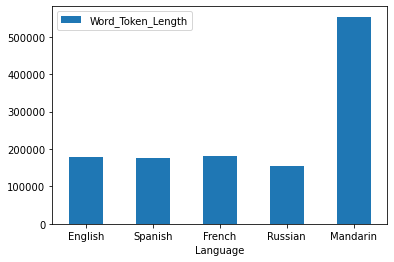

In [121]:
import matplotlib.pyplot as plt
sixway_df.plot.bar(x='Language', y='Word_Token_Length', rot=0)
plt.savefig("Word_Tokens.png")

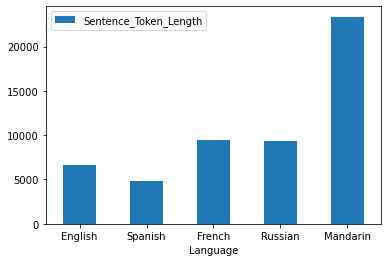

In [123]:
sixway_df.plot.bar(x='Language', y='Sentence_Token_Length', rot=0)
plt.savefig("Sentence_Length.png")

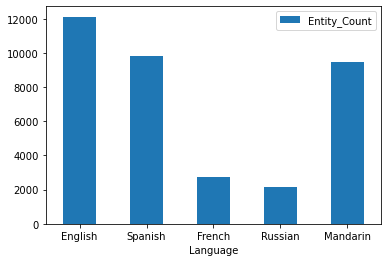

In [115]:
sixway_df.plot.bar(x='Language', y='Entity_Count', rot=0)
plt.savefig("EntityCount.png")

In [116]:
sixway_df['Average_Sentence_Length'] = sixway_df['Word_Token_Length']/sixway_df['Sentence_Token_Length']

In [117]:
sixway_df['TTR'] = sixway_df.POS_Count / sixway_df.Word_Token_Length

In [118]:
sixway_df

,Language,Document,Word_Tokens,Word_Token_Length,Sentence_Tokens,Sentence_Token_Length,POS_Count,POS_Set,POS_SetCount,Dependency,Dependency_Count,Entity_Label_List,Entity_Label_Count,Entity_Count,Average_Sentence_Length,TTR
0,English,RESOLUTION 918 (1994)\nAdopted by the Security...,"[RESOLUTION, 918, (, 1994, ), \n, Adopted, by,...",177808,[RESOLUTION 918 (1994)\nAdopted by the Securit...,6662,177808,"{INTJ, SYM, SCONJ, DET, VERB, SPACE, ADJ, PRON...",18,"{predet, case, nsubjpass, relcl, advmod, pcomp...",45,"{EVENT, CARDINAL, NORP, ORG, LAW, MONEY, TIME,...",18,12124,26.689883,1.0
1,Spanish,RESOLUCIÓN 918 (1994)\nAprobada por el Consejo...,"[RESOLUCIÓN, 918, (, 1994, ), \n, Aprobada, po...",176209,[RESOLUCIÓN 918 (1994)\nAprobada por el Consej...,4861,176209,"{INTJ, SYM, SCONJ, DET, VERB, NOUN, SPACE, ADJ...",17,"{obl, case, iobj, advmod, flat, expl:impers, f...",31,"{PER, LOC, MISC, ORG}",4,9826,36.249537,1.0
2,French,RESOLUTION 918 (1994)\nAdoptée par le Conseil ...,"[RESOLUTION, 918, (, 1994, ), \n, Adoptée, par...",181823,"[RESOLUTION 918 (1994)\n, Adoptée, par le Cons...",9440,181823,"{SYM, SCONJ, DET, VERB, SPACE, NOUN, ADJ, PRON...",16,"{case, flat:foreign, nsubj:pass, iobj, advmod,...",36,"{PER, LOC, MISC, ORG}",4,2762,19.260911,1.0
3,Russian,"РЕЗОЛЮЦИЯ 918 (1994),\nпринятая Советом Безопа...","[РЕЗОЛЮЦИЯ, 918, (, 1994, ), ,, \n, принятая, ...",153964,"[РЕЗОЛЮЦИЯ 918 (1994),\n, принятая Советом Без...",9310,153964,"{INTJ, SYM, SCONJ, DET, VERB, SPACE, NOUN, PRO...",18,"{obl, case, flat:foreign, nsubj:pass, iobj, ad...",40,"{PER, LOC, ORG}",3,2126,16.537487,1.0
4,Mandarin,第918(1994)号决议\n1994年5月17日安全理事会第3377次会议通过\n安全理事...,"[第918, (, 1994, )号, 决议, \n, 1994年, 5月, 17日, 安全...",553748,[第918(1994)号决议\n1994年5月17日安全理事会第3377次会议通过\n安全理...,23363,553748,"{INTJ, SCONJ, DET, VERB, NOUN, SPACE, PRON, AD...",16,"{case, nsubjpass, advcl:loc, aux:asp, advmod, ...",44,"{EVENT, CARDINAL, NORP, ORG, LAW, ORDINAL, TIM...",18,9476,23.701922,1.0


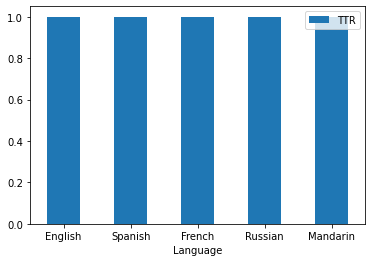

In [119]:
sixway_df.plot.bar(x='Language', y='TTR', rot=0)
plt.savefig("TTR.png")